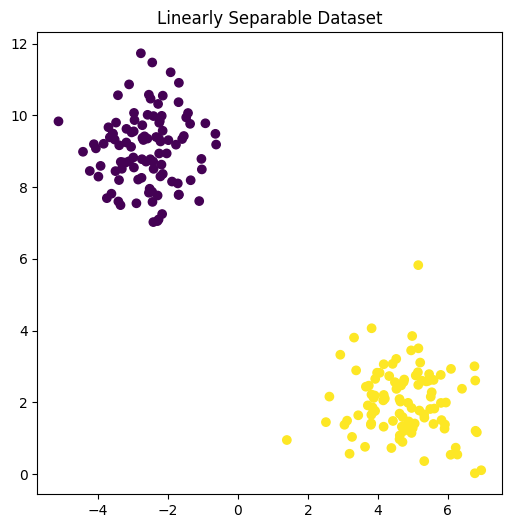

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training on Linearly Separable Data...
Linear Dataset - Loss: 0.0007, Accuracy: 1.0000


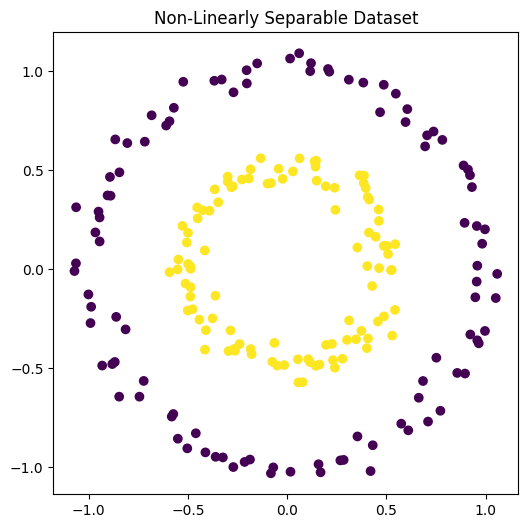

Training on Non-Linearly Separable Data...
Non-Linear Dataset - Loss: 0.6931, Accuracy: 0.4350
60411/60411 ━━━━━━━━━━━━━━━━━━━━ 76s 1ms/step


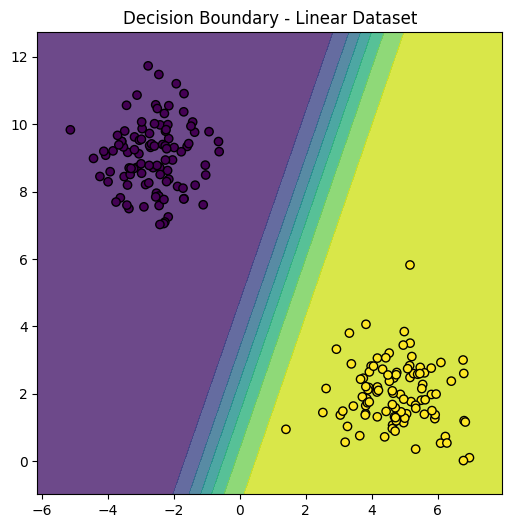

5331/5331 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step


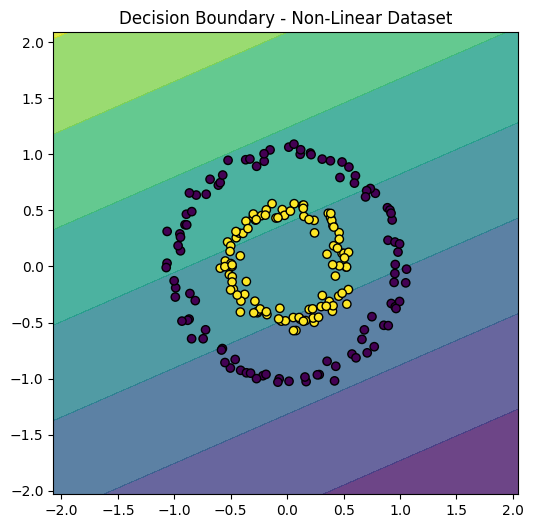

In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# 1. Create Linearly Separable Dataset
X_linear, y_linear = make_blobs(n_samples=200, centers=2, random_state=42)
plt.figure(figsize=(6, 6))
plt.scatter(X_linear[:, 0], X_linear[:, 1], c=y_linear, cmap='viridis')
plt.title("Linearly Separable Dataset")
plt.show()

# 2. Create and Train Model on Linearly Separable Data
model_linear = Sequential([
    Dense(1, input_dim=2, activation='sigmoid')  # No hidden layer
])

model_linear.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

print("Training on Linearly Separable Data...")
model_linear.fit(X_linear, y_linear, epochs=50, batch_size=10, verbose=0)

# Evaluate Model
loss, acc = model_linear.evaluate(X_linear, y_linear, verbose=0)
print(f"Linear Dataset - Loss: {loss:.4f}, Accuracy: {acc:.4f}")

# 3. Create Non-Linearly Separable Dataset
X_nonlinear, y_nonlinear = make_circles(n_samples=200, noise=0.05, factor=0.5, random_state=42)
plt.figure(figsize=(6, 6))
plt.scatter(X_nonlinear[:, 0], X_nonlinear[:, 1], c=y_nonlinear, cmap='viridis')
plt.title("Non-Linearly Separable Dataset")
plt.show()

# 4. Train Model on Non-Linearly Separable Data
print("Training on Non-Linearly Separable Data...")
model_nonlinear = Sequential([
    Dense(1, input_dim=2, activation='sigmoid')  # Same single-layer model
])

model_nonlinear.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])
model_nonlinear.fit(X_nonlinear, y_nonlinear, epochs=50, batch_size=10, verbose=0)

# Evaluate Model
loss, acc = model_nonlinear.evaluate(X_nonlinear, y_nonlinear, verbose=0)
print(f"Non-Linear Dataset - Loss: {loss:.4f}, Accuracy: {acc:.4f}")

# 5. Visualize Decision Boundaries
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(6, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap='viridis')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='viridis')
    plt.title(title)
    plt.show()

# Plot decision boundaries
plot_decision_boundary(model_linear, X_linear, y_linear, "Decision Boundary - Linear Dataset")
plot_decision_boundary(model_nonlinear, X_nonlinear, y_nonlinear, "Decision Boundary - Non-Linear Dataset")

In [ ]:
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=10000, noise=0.1, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
class NeuralNetwork:
    def __init__(self, input_size, output_size):
        self.weights = np.random.randn(input_size, output_size) * 0.01
        self.bias = np.zeros((1, output_size))

    def forward(self, X):
        return self.sigmoid(np.dot(X, self.weights) + self.bias)

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def sigmoid_derivative(self, z):
        return z * (1 - z)

    def train(self, X, y, learning_rate, epochs):
        for epoch in range(epochs):
            output = self.forward(X)

            error = output - y
            d_output = error * self.sigmoid_derivative(output)
            d_weights = np.dot(X.T, d_output)
            d_bias = np.sum(d_output, axis=0, keepdims=True)

            self.weights -= learning_rate * d_weights
            self.bias -= learning_rate * d_bias

    def predict(self, X):
        return (self.forward(X) > 0.5).astype(int)


In [ ]:
nn = NeuralNetwork(input_size=2, output_size=1)

nn.train(X_train, y_train.reshape(-1, 1), learning_rate=0.1, epochs=100)


In [ ]:
predictions = nn.predict(X_test)

accuracy = np.mean(predictions == y_test.reshape(-1, 1))
print("Accuracy:", accuracy)

Accuracy: 0.9025


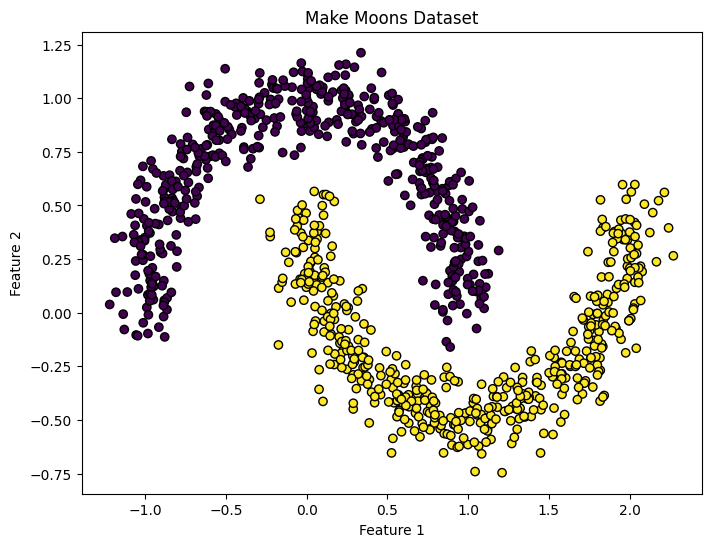

In [ ]:
x,y= make_moons(n_samples=1000, noise=0.1, random_state=42)
plt.figure(figsize=(8, 6))
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='viridis', edgecolors='k')
plt.title("Make Moons Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=10000, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.weights1 = np.random.randn(input_size, hidden_size) * 0.01
        self.bias1 = np.zeros((1, hidden_size))
        self.weights2 = np.random.randn(hidden_size, output_size) * 0.01
        self.bias2 = np.zeros((1, output_size))

    def forward(self, X):
        self.hidden_layer_output = self.sigmoid(np.dot(X, self.weights1) + self.bias1)
        return self.sigmoid(np.dot(self.hidden_layer_output, self.weights2) + self.bias2)

    def relu(self, z):
        return np.maximum(0, z)

    def relu_derivative(self, z):
        return (z > 0).astype(int)

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def sigmoid_derivative(self, z):
        return z * (1 - z)

    def train(self, X, y, learning_rate, epochs):
        for epoch in range(epochs):
            output = self.forward(X)

            error = output - y
            d_output = error * self.sigmoid_derivative(output)
            d_hidden_layer = np.dot(d_output, self.weights2.T) * self.relu_derivative(self.hidden_layer_output)

            d_weights2 = np.dot(self.hidden_layer_output.T, d_output)
            d_bias2 = np.sum(d_output, axis=0, keepdims=True)
            d_weights1 = np.dot(X.T, d_hidden_layer)
            d_bias1 = np.sum(d_hidden_layer, axis=0, keepdims=True)

            self.weights1 -= learning_rate * d_weights1
            self.bias1 -= learning_rate * d_bias1
            self.weights2 -= learning_rate * d_weights2
            self.bias2 -= learning_rate * d_bias2

    def predict(self, X):
        return (self.forward(X) > 0.5).astype(int)

nn = NeuralNetwork(input_size=2, hidden_size=5, output_size=1)

nn.train(X_train, y_train.reshape(-1, 1), learning_rate=0.001, epochs=100)

predictions = nn.predict(X_test)
accuracy = np.mean(predictions == y_test.reshape(-1, 1))
print("Accuracy:", accuracy)

Accuracy: 0.8985
